In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')

In [5]:
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')

In [6]:
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [12]:
df1[df1.time=='one']

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
95,a,4.641064,one
96,a,4.451358,one
97,a,2.442945,one
98,a,4.451080,one


In [13]:
df1[df1.time=='two']

,group,x,time
100,b,8.673649,two
101,a,2.411029,two
102,b,8.986474,two
103,b,8.993807,two
104,b,8.020419,two
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [39]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

<AxesSubplot:xlabel='time', ylabel='x'>

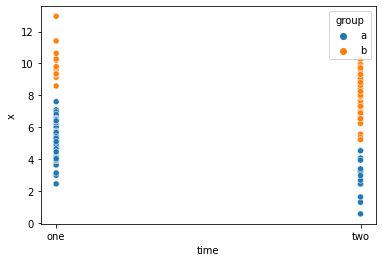

In [40]:
sns.scatterplot(x=df1.time,y=df1.x,hue=df1.group,data=df1)

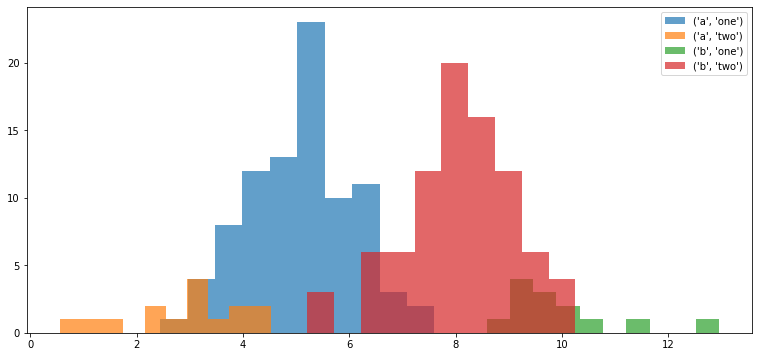

In [41]:
fig, ax = plt.subplots(figsize=(13, 6))

for g, x in df1.groupby(['group', 'time']).x:
    ax.hist(x, label=str(g), alpha=.7)
ax.legend()

In [25]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


<AxesSubplot:xlabel='x', ylabel='y'>

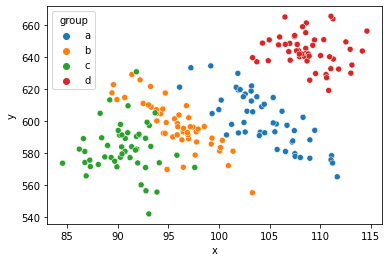

In [27]:
sns.scatterplot(x=df2.x,y=df2.y,hue=df2.group,data=df2)

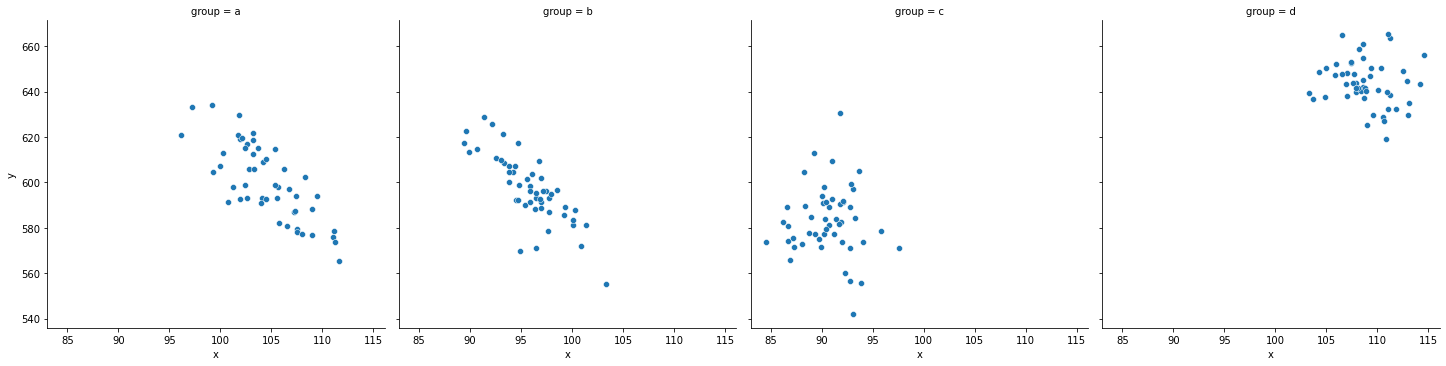

In [42]:
sns.relplot(data=df2, y='y', x='x', col='group')


In [28]:
df3

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
...,...,...,...
995,A,appendectomy,1
996,B,heart bypass,1
997,B,heart bypass,0
998,A,heart bypass,0


In [34]:
df3.surgeon.value_counts()

B    520
A    480
Name: surgeon, dtype: int64

In [32]:
df3[df3.surgeon=='A'].success.value_counts()

1    421
0     59
Name: success, dtype: int64

In [33]:
df3[df3.surgeon=='B'].success.value_counts()

1    376
0    144
Name: success, dtype: int64

In [36]:
df3[df3.surgery=='heart bypass'].surgeon.value_counts()

B    418
A     99
Name: surgeon, dtype: int64

In [37]:
heart_bypass = df3[df3.surgery=='heart bypass']
heart_bypass[heart_bypass.surgeon=='B'].success.value_counts()

1    281
0    137
Name: success, dtype: int64

In [38]:
heart_bypass[heart_bypass.surgeon=='A'].success.value_counts()

1    65
0    34
Name: success, dtype: int64

In [44]:
df3.pivot_table('success', 'surgeon', 'surgery')


surgery,appendectomy,heart bypass
surgeon,,
A,0.934383,0.656566
B,0.931373,0.672249


In [43]:
df3.pivot_table('success', 'surgeon', 'surgery', aggfunc=lambda x: x.size)


surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418
